In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import Classification
import datetime, time
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sbn

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import johnson_lindenstrauss_min_dim as jlmd, SparseRandomProjection
from sklearn import svm


In [3]:
filename = 'Chicago_Crime.csv'
types = {
    'IUCR': 'category',
    'Primary Type' : 'category',
    'Description': 'category',
    'Location Description': 'category',
    'Block': 'category',
    'Beat': 'category',
    'District': 'category',
    'Community Area': 'category',
    'Domestic': 'category'
}
n = 10000
s = 42

In [ ]:
clf = Classification.classification(filename, types, n, s)
data = clf.process_data()
full_set = data
IUCR = data[['IUCR', 'Primary Type', 'Description']].sort_values(['IUCR'])
geog = data[['Block', 'Beat', 'District', 'Community Area', 'Latitude', 'Longitude']]
data = data.drop(['Date', 'Time', 'Primary Type', 'Description', 'Block', 'District', 'Community Area', 'Beat'], axis = 1)

ohe = pd.get_dummies(data)

Xs = list(ohe.columns)[1:]
Y = 'Arrest'
test_prob = 0.25

Processing Data...
Random State: 42
Sample Size: 10000

Done Processing


True Number of Arrests: 551
Classifier: svmLin
Dimensional Reduction Technique: None
Linear SVC: 
   Actual\Predicted     0    1
0                 0  1864   85
1                 1   247  304
   Accuracy       FPR  Sensitivity  Specificity
0    0.8672  0.043612     0.551724     0.956388

True Number of Arrests: 551
Classifier: svmLin
Dimensional Reduction Technique: lda


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


186
LDA + Linear SVC: 
   Actual\Predicted     0    1
0                 0  1889   60
1                 1   261  290
   Accuracy       FPR  Sensitivity  Specificity
0    0.8716  0.030785     0.526316     0.969215

True Number of Arrests: 551
Classifier: svmLin
Dimensional Reduction Technique: pca
PCA + Linear SVC: 
   Actual\Predicted     0    1
0                 0  1849  100
1                 1   242  309
   Accuracy       FPR  Sensitivity  Specificity
0    0.8632  0.051308     0.560799     0.948692



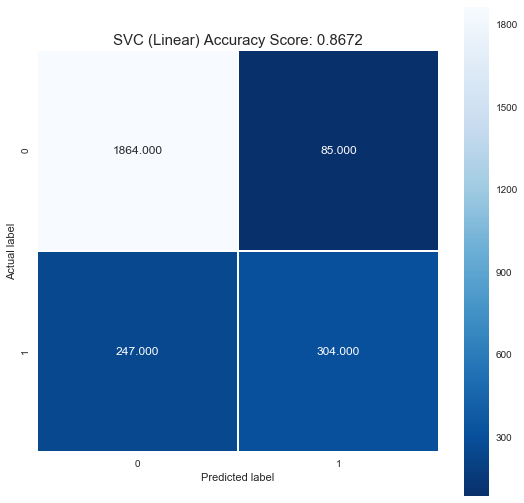

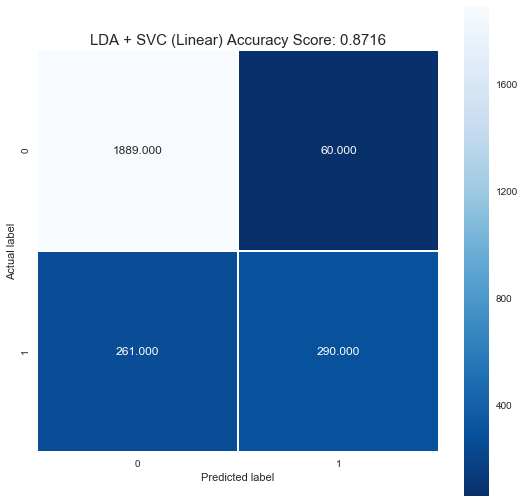

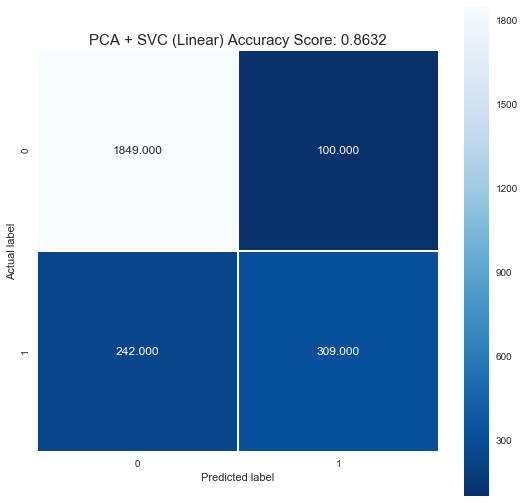

In [6]:
# SVM with Linear Kernel
svmLin = svm.SVC(kernel = 'linear', gamma = 0.001, C = 5.0)
svmLin, svmLin_scores, svmLin_cm = clf.classification(svmLin, ohe, Xs, Y, test_prob, classifier = 'svmLin', scaled = True)
print('Linear SVC: ')
print(svmLin_cm)
print(svmLin_scores)
print()

svmLin_lda = svm.SVC(kernel = 'linear', gamma = 0.001, C = 5.0)
svmLin_lda, svmLin_lda_scores, svmLin_lda_cm = clf.classification(svmLin_lda, ohe, Xs, Y, test_prob, classifier = 'svmLin', dim_reduction = 'lda', scaled = True)
print('LDA + Linear SVC: ')
print(svmLin_lda_cm)
print(svmLin_lda_scores)
print()

svmLin_pca = svm.SVC(kernel = 'linear', gamma = 0.001, C = 5.0)
svmLin_pca, svmLin_pca_scores, svmLin_pca_cm = clf.classification(svmLin_pca, ohe, Xs, Y, test_prob, classifier = 'svmLin', dim_reduction = 'pca', scaled = True)
print('PCA + Linear SVC: ')
print(svmLin_pca_cm)
print(svmLin_pca_scores)
print()

# SVM with Radial Kernel
#svmRad = svm.SVC(kernel = 'rbf', gamma = 0.001, C = 1.0)
#svmRad, svmRad_lda_scores, svmRad_lda_cm = clf.classification(svmRad, ohe, Xs, Y, test_prob, classifier = 'svmRad', dim_reduction = 'lda', scaled = True)
#print('LDA + Radial SVM: ')
#print(svmRad_lda_cm)
#print(svmRad_lda_scores)


In [ ]:
# SVM with Linear Kernel
svmLin = svm.SVC(kernel = 'linear', gamma = 0.001, C = 5.0)
svmLin, svmLin_scores, svmLin_cm = clf.classification(svmLin, ohe, Xs, Y, test_prob, classifier = 'svmLin', scaled = True)
print('Linear SVC: ')
print(svmLin_cm)
print(svmLin_scores)
print()

svmLin_lda = svm.SVC(kernel = 'linear', gamma = 0.001, C = 5.0)
svmLin_lda, svmLin_lda_scores, svmLin_lda_cm = clf.classification(svmLin_lda, ohe, Xs, Y, test_prob, classifier = 'svmLin', dim_reduction = 'lda', scaled = True)
print('LDA + Linear SVC: ')
print(svmLin_lda_cm)
print(svmLin_lda_scores)
print()

svmLin_pca = svm.SVC(kernel = 'linear', gamma = 0.001, C = 5.0)
svmLin_pca, svmLin_pca_scores, svmLin_pca_cm = clf.classification(svmLin_pca, ohe, Xs, Y, test_prob, classifier = 'svmLin', dim_reduction = 'pca', scaled = True)
print('PCA + Linear SVC: ')
print(svmLin_pca_cm)
print(svmLin_pca_scores)
print()

True Number of Arrests: 551
Classifier: svmLin
Dimensional Reduction Technique: None


True Number of Arrests: 551
Classifier: logReg
Dimensional Reduction Technique: None

Logistic Regression: 
   Actual\Predicted     0    1
0                 0  1869   80
1                 1   253  298
   Accuracy       FPR  Sensitivity  Specificity
0    0.8668  0.041047     0.540835     0.958953
True Number of Arrests: 551
Classifier: logReg
Dimensional Reduction Technique: None

Scaled Logistic Regression: 
   Actual\Predicted     0    1
0                 0  1869   80
1                 1   253  298
   Accuracy       FPR  Sensitivity  Specificity
0    0.8668  0.041047     0.540835     0.958953
True Number of Arrests: 551
Classifier: logReg
Dimensional Reduction Technique: pca

PCA + Logistic Regression: 
   Actual\Predicted     0    1
0                 0  1865   84
1                 1   249  302
   Accuracy       FPR  Sensitivity  Specificity
0    0.8668  0.043099     0.548094     0.956901
True Number of Arrests: 551
Classifier: logReg
Dimensional Reduction Technique: lda


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


186

LDA + Logistic Regression: 
   Actual\Predicted     0    1
0                 0  1860   89
1                 1   244  307
   Accuracy       FPR  Sensitivity  Specificity
0    0.8668  0.045664     0.557169     0.954336
True Number of Arrests: 551
Classifier: lda
Dimensional Reduction Technique: None

LDA: 
   Actual\Predicted     0    1
0                 0  1868   81
1                 1   248  303
   Accuracy      FPR  Sensitivity  Specificity
0    0.8684  0.04156     0.549909      0.95844
True Number of Arrests: 551
Classifier: qda
Dimensional Reduction Technique: None


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



QDA: 
   Actual\Predicted    0     1
0                 0  330  1619
1                 1   17   534
   Accuracy       FPR  Sensitivity  Specificity
0    0.3456  0.830682     0.969147     0.169318
True Number of Arrests: 551
Classifier: knn
Dimensional Reduction Technique: pca

PCA + KNN: 
   Actual\Predicted     0    1
0                 0  1878   71
1                 1   285  266
   Accuracy       FPR  Sensitivity  Specificity
0    0.8576  0.036429     0.482759     0.963571
True Number of Arrests: 551
Classifier: knn
Dimensional Reduction Technique: lda
186

LDA + KNN: 
   Actual\Predicted     0    1
0                 0  1840  109
1                 1   252  299
   Accuracy       FPR  Sensitivity  Specificity
0    0.8556  0.055926      0.54265     0.944074
True Number of Arrests: 551
Classifier: svmLin
Dimensional Reduction Technique: lda
186

LDA + Linear SVC: 
   Actual\Predicted     0    1
0                 0  1889   60
1                 1   261  290
   Accuracy       FPR  Sensitivit

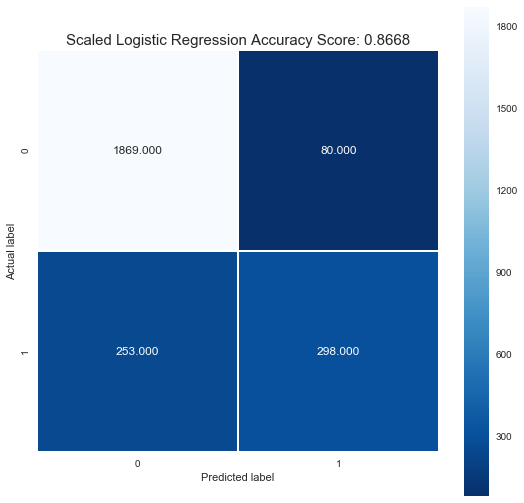

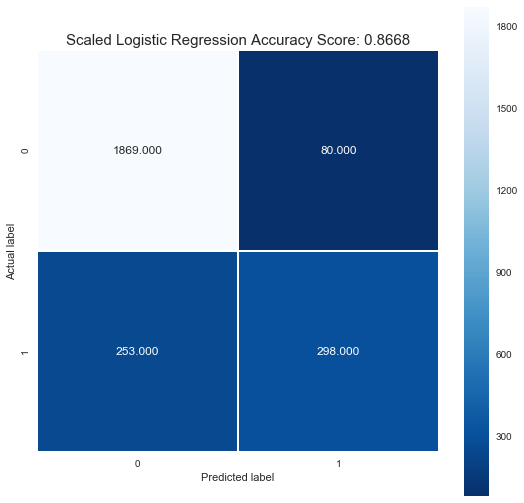

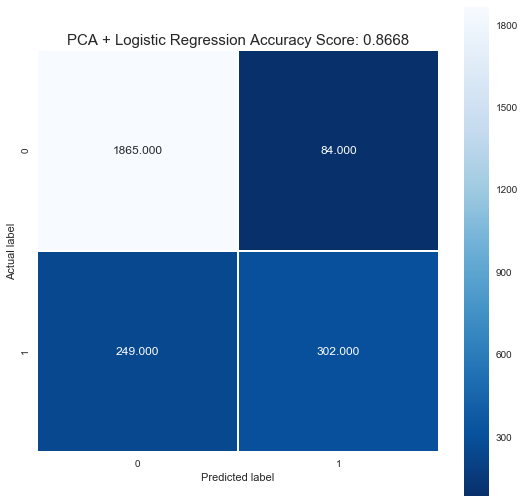

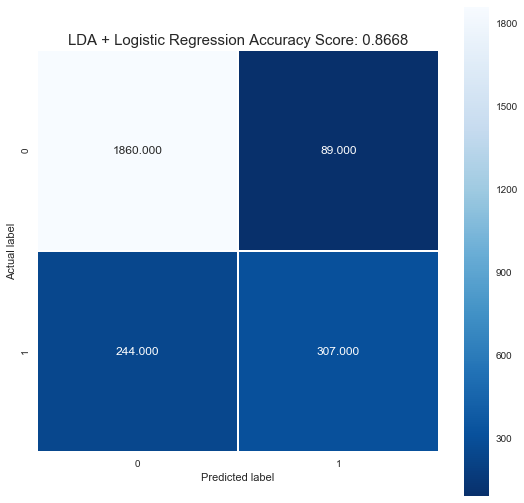

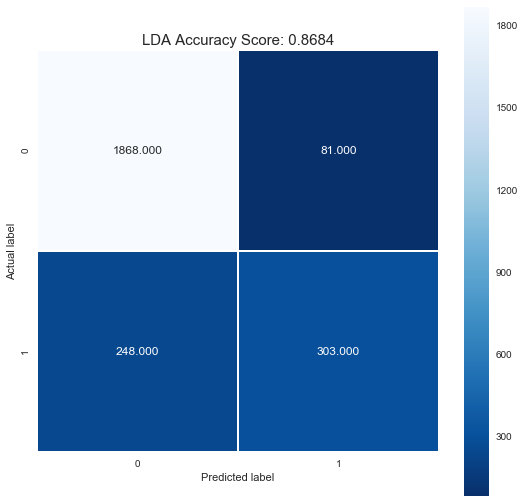

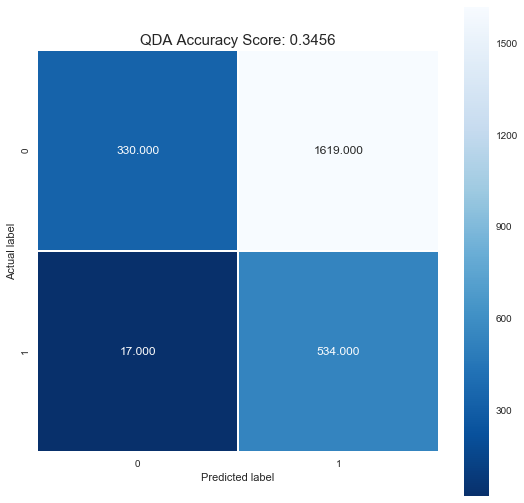

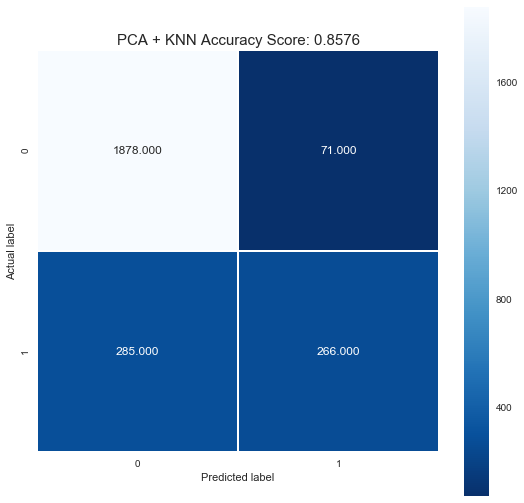

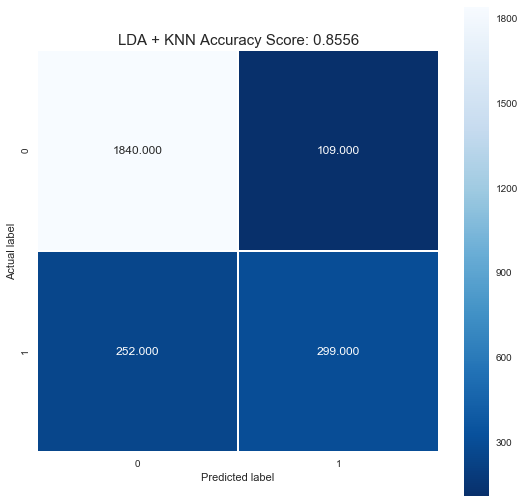

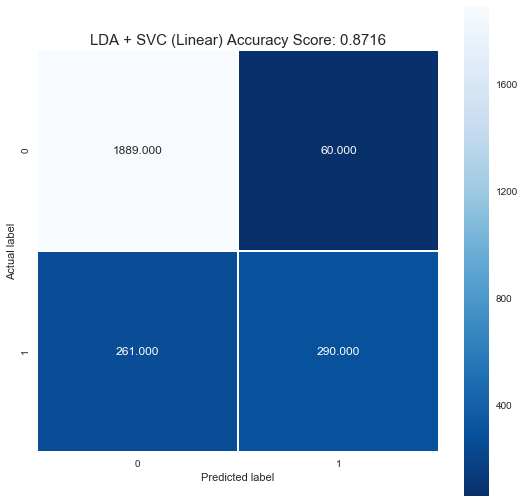

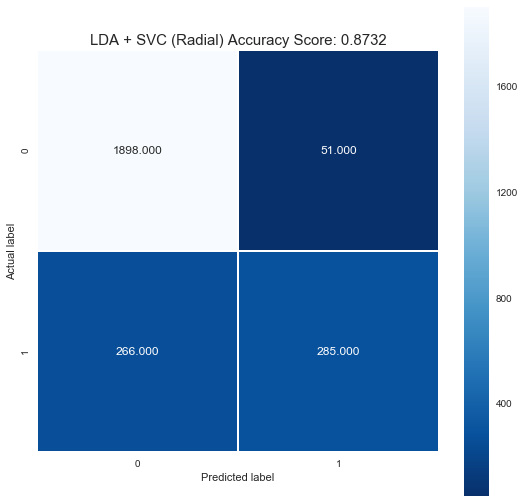

In [7]:
#logistic regression on full One Hot Model, unscaled
logReg = LogisticRegression(solver = 'lbfgs')
logReg, logReg_scores, logReg_cm = clf.classification(logReg, ohe, Xs, Y, test_prob)
print('\nLogistic Regression: ')
print(logReg_cm)
print(logReg_scores)

#logistic regression on full One Hot Model, scaled
logReg_sc = LogisticRegression(solver = 'lbfgs')
logReg_sc, logReg_sc_scores, logReg_sc_cm = clf.classification(logReg_sc, ohe, Xs, Y, test_prob, scaled = True)
print('\nScaled Logistic Regression: ')
print(logReg_sc_cm)
print(logReg_sc_scores)

# Logistic Regression with PCA
logReg_pca = LogisticRegression(solver = 'lbfgs')
logReg_pca, logReg_pca_scores, logReg_pca_cm = clf.classification(logReg_pca, ohe, Xs, Y, test_prob, dim_reduction = 'pca', scaled = True)
print('\nPCA + Logistic Regression: ')
print(logReg_pca_cm)
print(logReg_pca_scores)

# Logistic Regression with LDA
logReg_lda = LogisticRegression(solver = 'lbfgs')
logReg_lda, logReg_lda_scores, logReg_lda_cm = clf.classification(logReg_lda, ohe, Xs, Y, test_prob, dim_reduction = 'lda', scaled = True)
print('\nLDA + Logistic Regression: ')
print(logReg_lda_cm)
print(logReg_lda_scores)

# LDA
lda = LinearDiscriminantAnalysis()
lda, lda_scores, lda_cm = clf.classification(lda, ohe, Xs, Y, test_prob, classifier = 'lda', scaled = True)
print('\nLDA: ')
print(lda_cm)
print(lda_scores)

# SVM with Linear Kernel + LDA
svmLin_lda = svm.SVC(kernel = 'linear', gamma = 0.001, C = 1.0)
svmLin_lda, svmLin_lda_scores, svmLin_lda_cm = clf.classification(svmLin_lda, ohe, Xs, Y, test_prob, classifier = 'svmLin', dim_reduction = 'lda', scaled = True)
print('\nLDA + Linear SVC: ')
print(svmLin_lda_cm)
print(svmLin_lda_scores)

# SVM with Radial Kernel
svmRad = svm.SVC(kernel = 'rbf', gamma = 0.001, C = 1.0)
svmRad, svmRad_lda_scores, svmRad_lda_cm = clf.classification(svmRad, ohe, Xs, Y, test_prob, classifier = 'svmRad', dim_reduction = 'lda', scaled = True)
print('\nLDA + Radial SVM: ')
print(svmRad_lda_cm)
print(svmRad_lda_scores)


In [ ]:
# QDA 
qda = QuadraticDiscriminantAnalysis()
qda, qda_scores, qda_cm = clf.classification(qda, ohe, Xs, Y, test_prob, classifier = 'qda', scaled = True)
print('\nQDA: ')
print(qda_cm)
print(qda_scores)

# KNN
knn_pca = KNeighborsClassifier(n_neighbors = 5)
knn_pca, knn_pca_scores, knn_pca_cm = clf.classification(knn_pca, ohe, Xs, Y, test_prob, classifier = 'knn', dim_reduction = 'pca', scaled = True)
print('\nPCA + KNN: ')
print(knn_pca_cm)
print(knn_pca_scores)

knn_lda = KNeighborsClassifier(n_neighbors = 5)
knn_lda, knn_lda_scores, knn_lda_cm = clf.classification(knn_lda, ohe, Xs, Y, test_prob, classifier = 'knn', dim_reduction = 'lda', scaled = True)
print('\nLDA + KNN: ')
print(knn_lda_cm)
print(knn_lda_scores)

In [10]:
huge_clf = Classification.classification(filename, types, n, s)
huge_set = huge_clf.process_data()
huge_set.drop(['Date', 'Time', 'Primary Type', 'Description', 'Beat', 'Block', 'District', 'Community Area'], axis = 1)
huge_ohe = pd.get_dummies(huge_set)


TypeError: __init__() takes from 4 to 5 positional arguments but 6 were given

In [ ]:
Xs = list(huge_ohe.columns)[1:]

srp = SparseRandomProjection()
srp, sparse_proj_X = huge_clf.sparse_random_projection(srp, huge_ohe[Xs], huge_ohe[Y])
#srp, sparse_proj_X = clf.sparse_random_projection(srp, ohe[Xs], ohe[Y], 0)


In [ ]:
print(sparse_proj_X.shape)


In [ ]:
#print(data.dtypes)
#data.head()
#data.describe(include = 'all')
#ohe.describe()

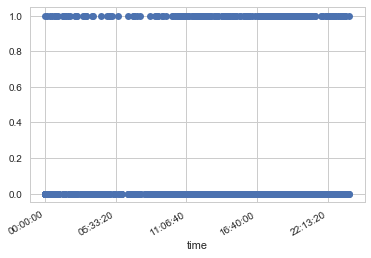

In [16]:
# How to plot time data
plt.plot(full_set['Time'], full_set['Arrest'], marker = 'o', linewidth = 0)
plt.gcf().autofmt_xdate()

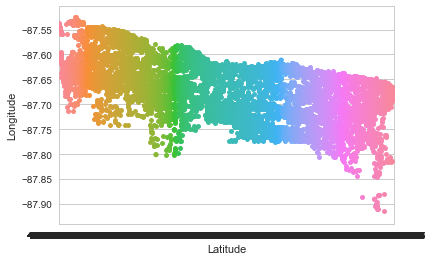

In [87]:
#sbn.stripplot(x = data['Latitude'], y = data['Longitude'], jitter=True)


In [18]:
# look at breakdown arrests by month, year, hour
MonthlyArrests = data.pivot_table(index = ['Year', 'Month'], values = 'Arrest', aggfunc = sum).dropna()
YearlyArrests = MonthlyArrests.pivot_table(index = 'Year', values = 'Arrest', aggfunc = sum)
HourlyArrests = data.pivot_table(index = 'Hour', values = 'Arrest', aggfunc = sum).dropna()
PercHourlyArrests = HourlyArrests/sum(HourlyArrests['Arrest'])